In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Clustering

Why might we do clustering?
- Exploration
- Labeling
- Features for Supervised Learning

KMeans Algorithm

1. Start with k random points
2. Assign every observation to the closest centroids
3. Recalculate centroids
4. Repeat

In [3]:
iris = sns.load_dataset('iris')

# data split
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [42]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Cluster

1. Choose feature to cluster on
2. choose k
3. create and fit the model

In [4]:
X = train_scaled[['petal_length', 'sepal_length']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

1. Look at the model's output
2. Interpretation
3. visualize

In [5]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_length,sepal_length
0,-1.196098,-0.957210
1,0.767214,0.736523
2,0.310965,-0.237345
3,1.479476,1.954079


Note that the cluster centers:
    
- are not observations from the original dataset
- the units are scaled

In [7]:
kmeans.labels_

array([0, 2, 2, 1, 0, 1, 3, 0, 3, 1, 2, 1, 0, 1, 1, 0, 2, 3, 0, 1, 2, 2,
       0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 2, 3, 1,
       1, 2, 0, 2, 2, 1, 2, 1, 1, 3, 3, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 3,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 3, 0, 0, 0, 1, 1, 2,
       2, 1, 3, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1,
       3, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int32)

In [8]:
train['cluster'] = kmeans.labels_

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
train

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
41,4.5,2.3,1.3,0.3,setosa,0
142,5.8,2.7,5.1,1.9,virginica,2
82,5.8,2.7,3.9,1.2,versicolor,2
127,6.1,3.0,4.9,1.8,virginica,1
28,5.2,3.4,1.4,0.2,setosa,0
...,...,...,...,...,...,...
29,4.7,3.2,1.6,0.2,setosa,0
52,6.9,3.1,4.9,1.5,versicolor,1
1,4.9,3.0,1.4,0.2,setosa,0
57,4.9,2.4,3.3,1.0,versicolor,0


In [10]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.040000,3.404444,1.544444,0.291111
1,6.444737,2.950000,5.047368,1.731579
2,5.637037,2.696296,4.233333,1.407407
3,7.454545,3.136364,6.318182,2.027273


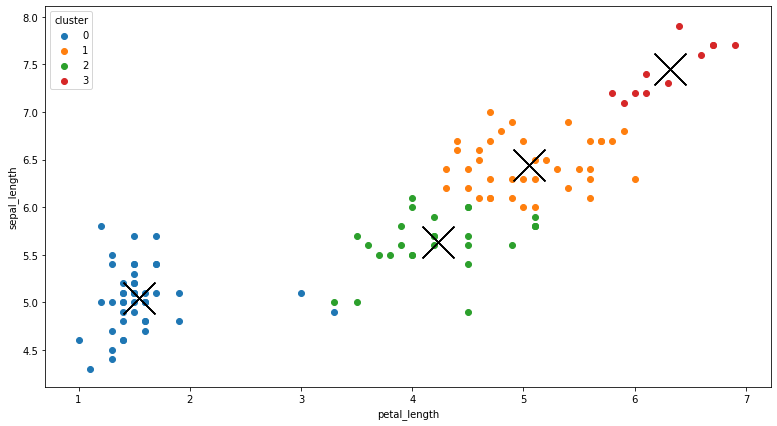

In [15]:
fig, ax = plt.subplots(figsize=(13,7))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.petal_length, subset.sepal_length, label=cluster)
    plt.legend(title='cluster')
    plt.ylabel('sepal length')
    plt.xlabel('petal length')
    train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_length', marker='x', s=1000, ax=ax, c='black')

# How do we choose a value for k?

**It's a judgement call**

- domain knowledge
- educated guesses
- the elbow method

In [16]:
# sum of squared distances from each point to its cluster center
kmeans.inertia_

23.19642810385509

# Elbow Method
1. Choose a range of k values
2. Creae a model for each k and record inertia
3. Visualize results

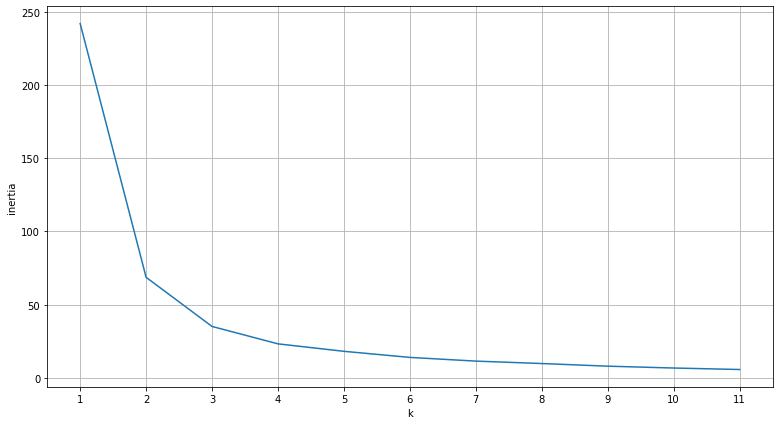

In [18]:
output = {}
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_
    
ax = pd.Series(output).plot(figsize=(13,7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12))
ax.grid()

# Scaling is Important

Demo: clustering on data with different scales

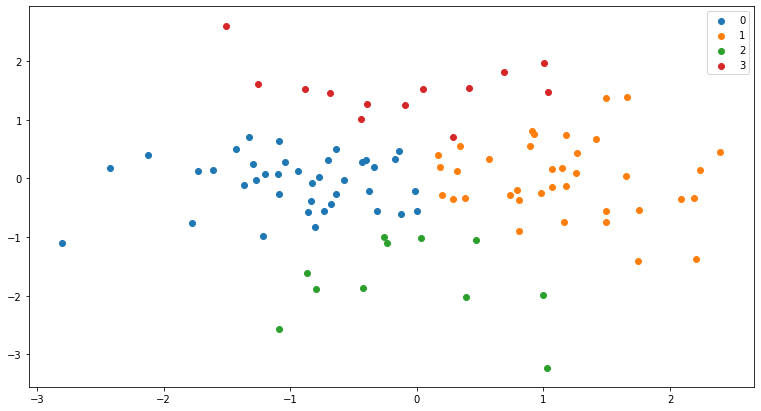

In [25]:
np.random.seed(123)

df = pd.DataFrame({
    'x': np.random.randn(100),
    'y': np.random.randn(100)
})

kmeans = KMeans(n_clusters=4).fit(df)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(13,7))
for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.x, subset.y, label=cluster)
plt.legend()
           


**Takeaway: cluster on scaled data, but the produced clusters can be used with the original dataset**

# Example 2: Insurance Data

In [26]:
df = pd.read_csv('https://gist.githubusercontent.com/zgulde/ad9305acb30b00f768d4541a41f5ba19/raw/01f4ac8f158e68b0d293ff726c0c1dd08cdd501d/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [28]:
# data split
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['age', 'bmi', 'charges']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

# Cluster

1. Choose a k
2. Create the model and produce clusters
3. Interpret results

In [33]:
X = train_scaled[['age', 'bmi', 'children', 'smoker', 'charges']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train['cluster'] = kmeans.labels_

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
train.groupby('cluster').mean()

,age,sex,bmi,children,smoker,region,charges
cluster,,,,,,,
0,48.023810,0.547619,36.788810,0.476190,0.000000,1.452381,9169.871743
1,39.631579,0.447368,31.143092,2.644737,0.078947,1.500000,10878.666749
2,52.440000,0.460000,26.331600,0.420000,0.240000,1.340000,14918.686028
3,40.150000,0.725000,35.264625,1.100000,1.000000,1.625000,40941.054304
4,24.000000,0.506849,27.651918,0.410959,0.123288,1.561644,5244.147329


--------------------------------------------------------------------------------

# Mall Data

In [36]:
from acquire import get_mall_data

In [37]:
df = get_mall_data()

In [38]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.loc[(df.gender == 'Male'),'gender']='1'


In [40]:
df.loc[(df.gender == 'Female'),'gender']='0'


In [41]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [44]:
# data split
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['age', 'annual_income', 'spending_score']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

# Cluster

**Choose features to cluster on**

In [46]:
X = train_scaled[['gender', 'age', 'annual_income', 'spending_score']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
train['cluster'] = kmeans.labels_

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score
cluster,,,,
0,64.903846,53.846154,45.884615,38.519231
1,160.030303,32.757576,85.909091,80.636364
2,161.312500,39.843750,87.437500,19.843750
3,53.400000,24.933333,39.955556,60.000000
